🎬 Movie Sales Data Analysis

📊 Loading Data...
Sales data loaded: 30612 rows, 16 columns
Metadata loaded: 11364 rows, 13 columns

📋 Sales Data Columns:
['year', 'release_date', 'title', 'genre', 'international_box_office', 'domestic_box_office', 'worldwide_box_office', 'production_budget', 'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime', 'keywords', 'creative_type', 'url']

📋 Metadata Columns:
['url', 'title', 'studio', 'rating', 'runtime', 'cast', 'director', 'genre', 'summary', 'awards', 'metascore', 'userscore', 'RelDate']

🔍 Sales Data Sample:
   year     release_date                title              genre  \
0  2000      January 1st         Bakha Satang              Drama   
1  2001     January 12th            Antitrust  Thriller/Suspense   
2  2000     January 28th             Santitos                NaN   
3  2002  2002 (Wide) by   Frank McKlusky C.I.                NaN   
4  2002     January 25th   A Walk to Remember              Drama   

  

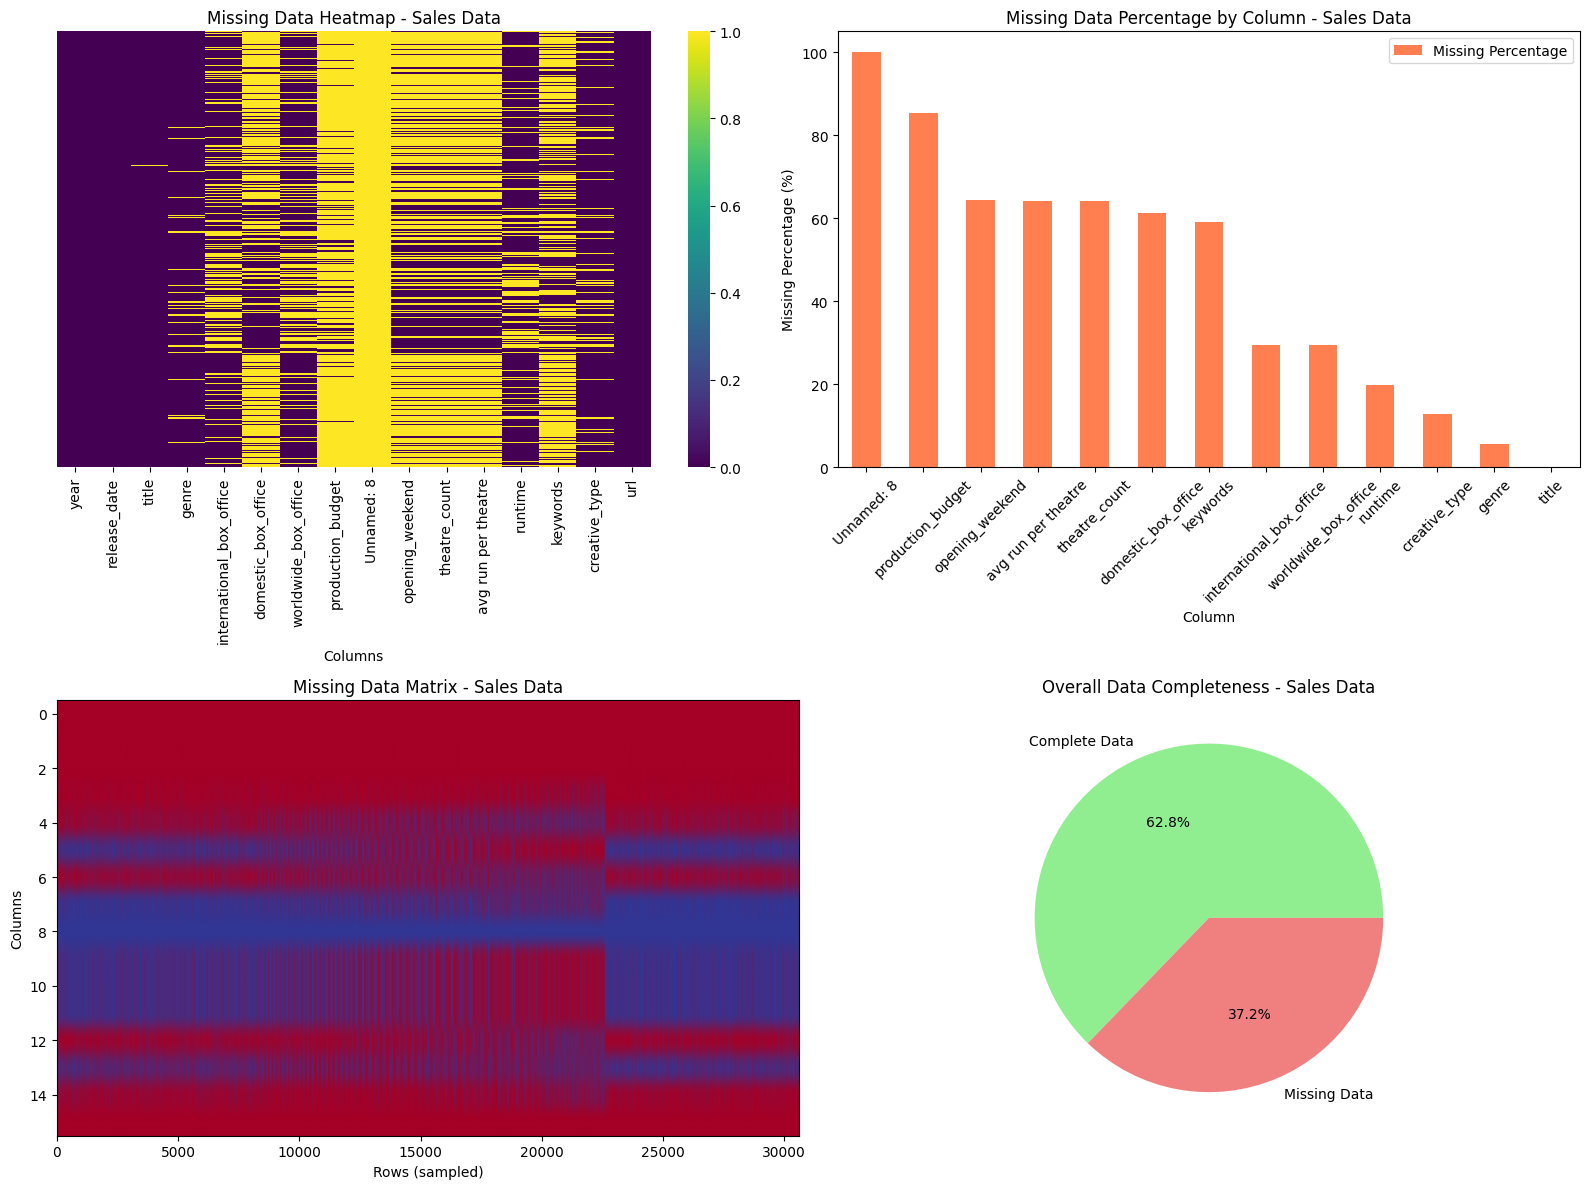


🔍 Missing Data Analysis - Metadata
Missing Data Summary:
   Column  Missing Count  Missing Percentage
   awards           6977           61.395635
  summary           5897           51.891939
     cast           3702           32.576558
userscore           2105           18.523407
   rating           1067            9.389300
   studio            350            3.079901
  runtime            255            2.243928
    genre             20            0.175994
 director             14            0.123196


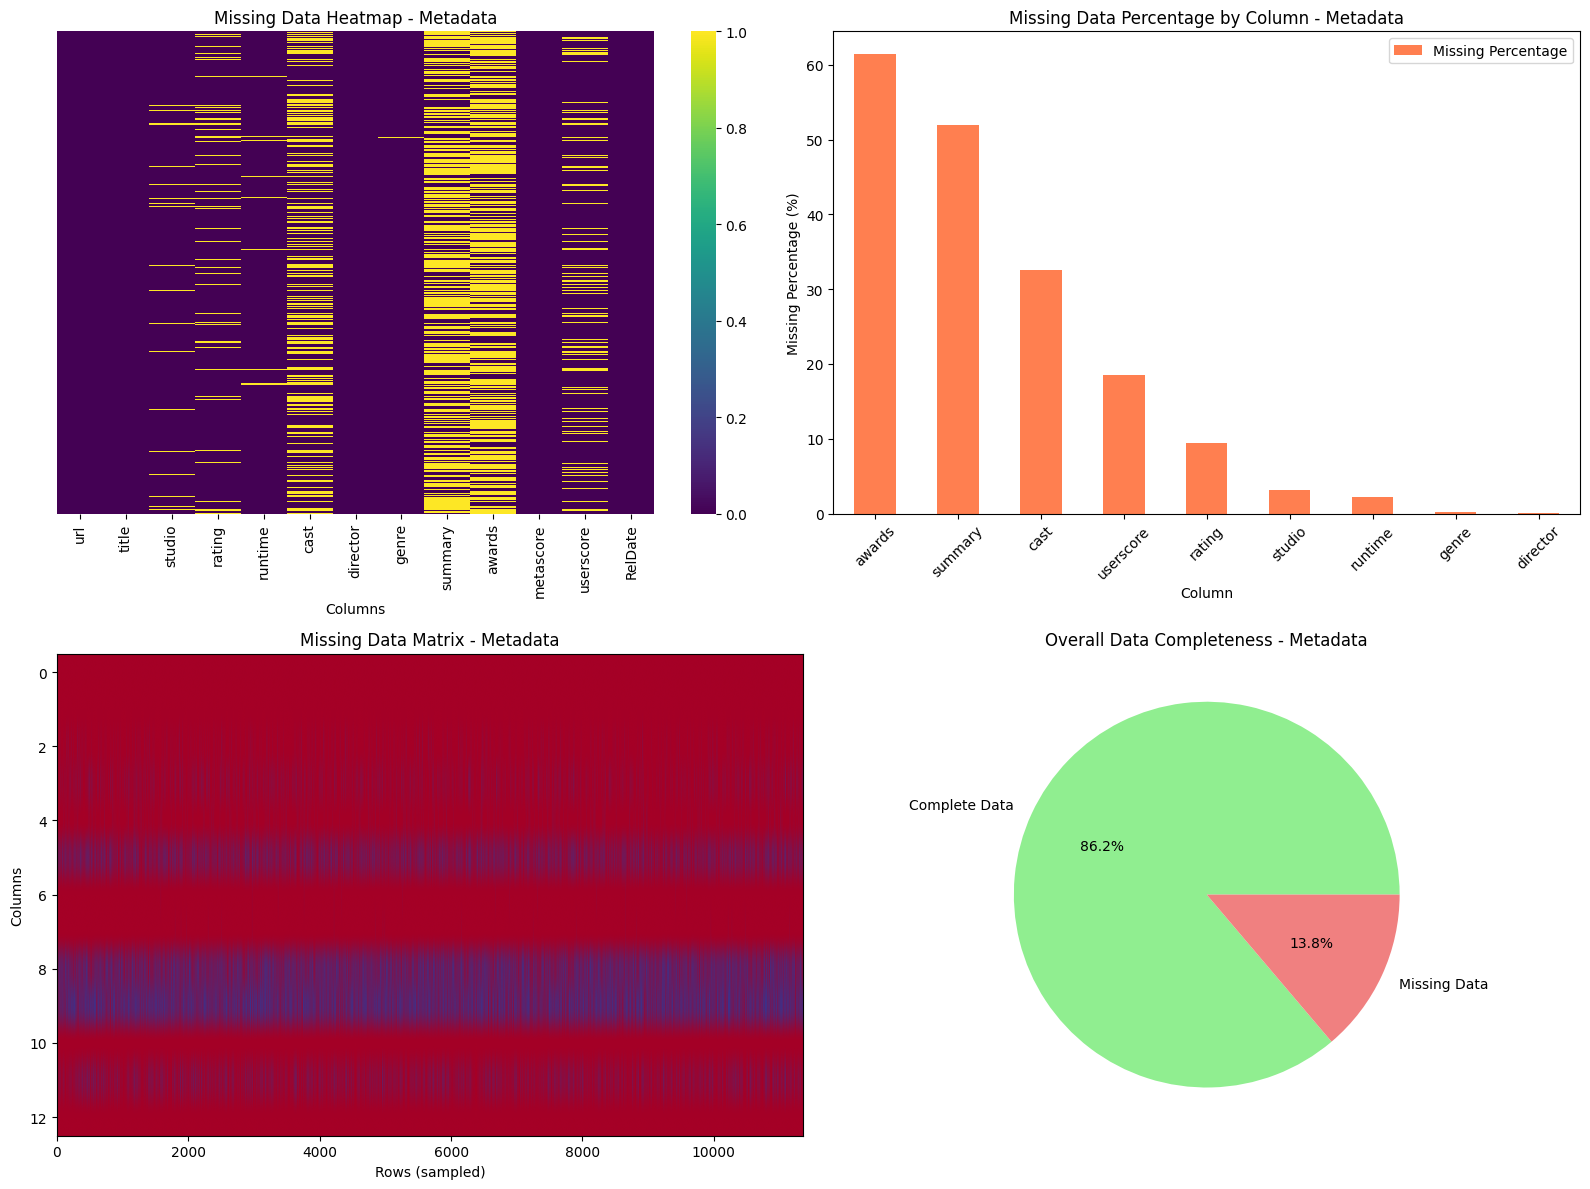


🧹 Cleaning Sales Data...
Data shape after cleaning: (30612, 16)
Missing data reduced from 182343 to 152546

🧹 Cleaning Metadata...
Metadata shape after cleaning: (11364, 14)

📈 Descriptive Statistics - Sales Data

Numeric Variables Summary:
               year  international_box_office  domestic_box_office  \
count  30612.000000              2.157500e+04         1.188400e+04   
mean    2014.542108              1.586202e+07         1.735331e+07   
std        5.525085              6.659680e+07         5.050972e+07   
min     2000.000000              2.000000e+00         2.000000e+01   
25%     2012.000000              2.637500e+04         2.986550e+04   
50%     2016.000000              3.348470e+05         2.587510e+05   
75%     2019.000000              4.282312e+06         7.667212e+06   
max     2021.000000              2.085392e+09         9.366622e+08   

       worldwide_box_office  production_budget  Unnamed: 8  opening_weekend  \
count          2.157500e+04       4.480000e+03  

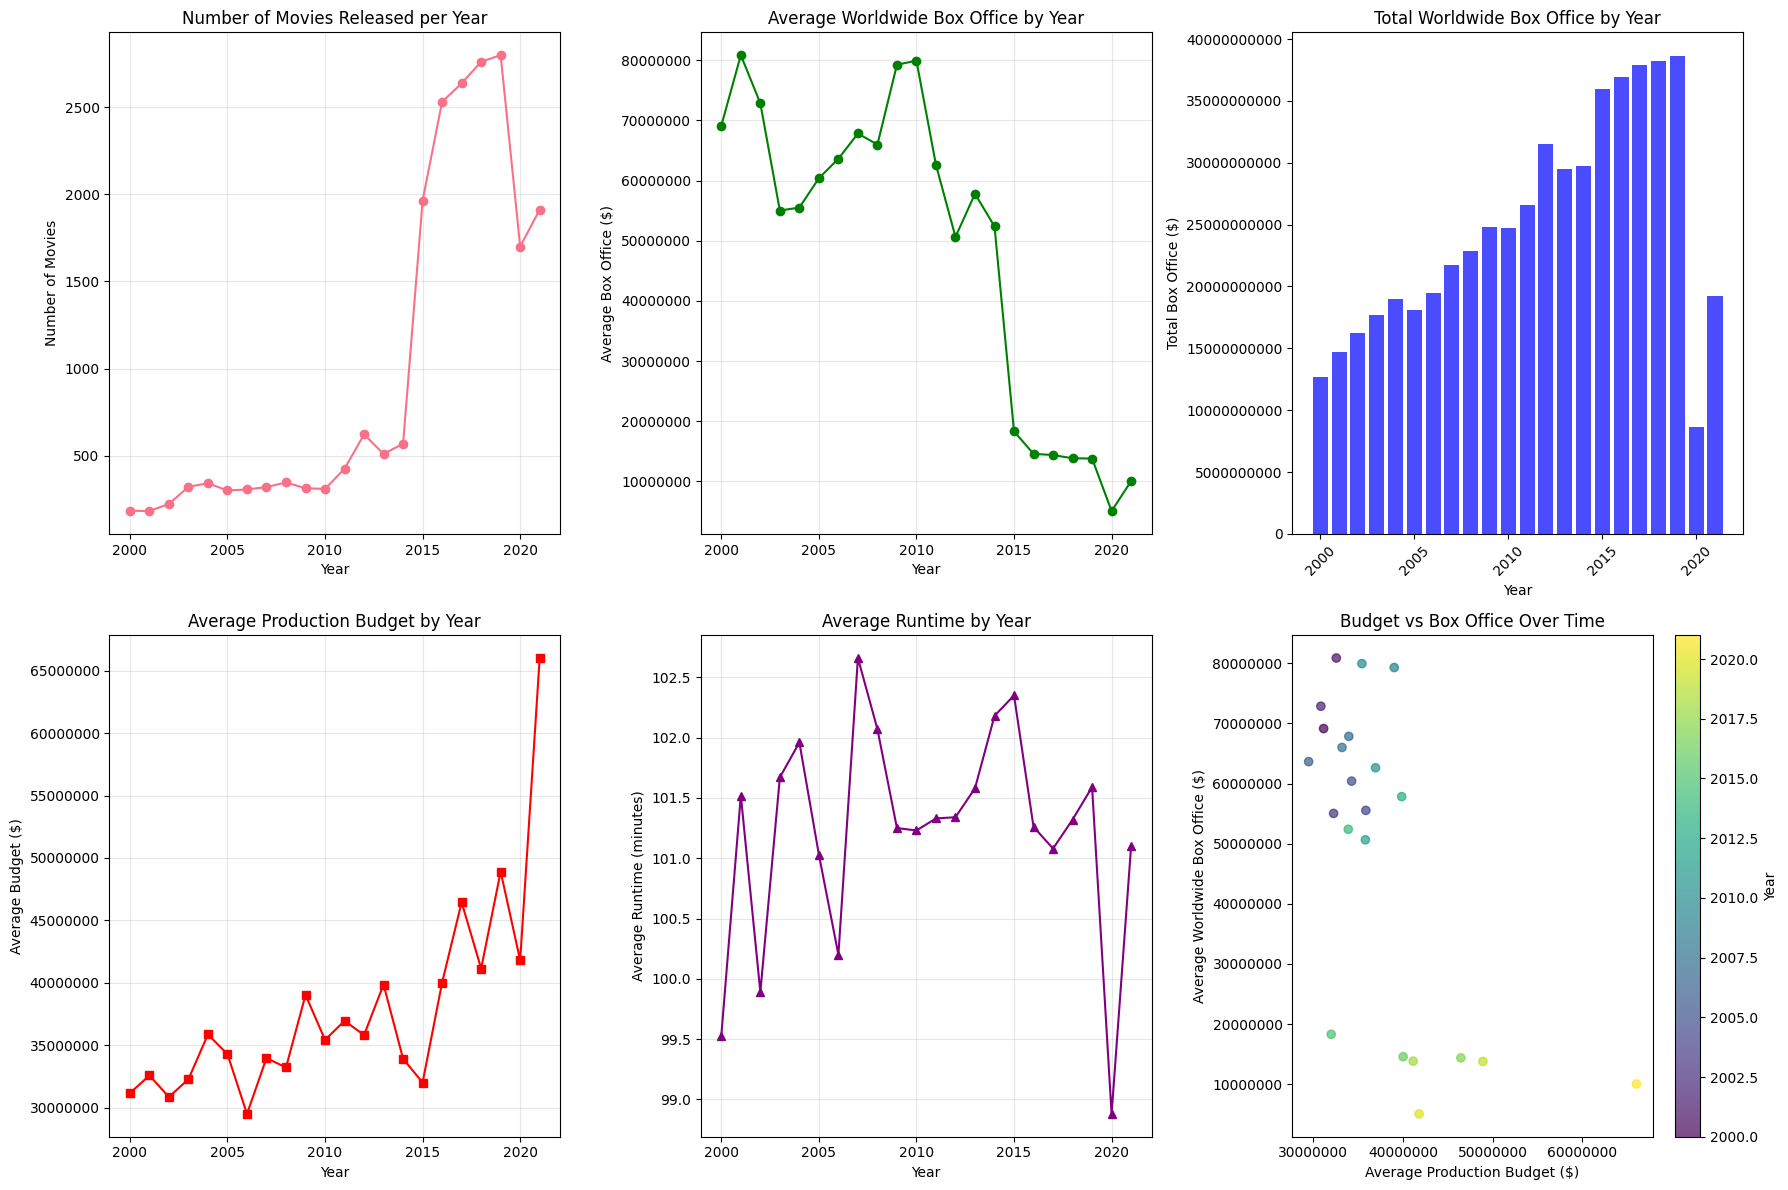


🎭 Genre Analysis
Top 10 Genres by Average Box Office:
                genre  worldwide_box_office_count  worldwide_box_office_mean
0              Action                        1548                90540604.69
1           Adventure                        1821                87626688.92
10            Musical                         209                49929138.13
15            Western                          54                40807051.28
11            Reality                           2                34332591.50
2        Black Comedy                         145                26589750.67
13  Thriller/Suspense                        1618                25466079.78
12    Romantic Comedy                         913                21996749.32
8              Horror                        1164                21350268.93
3              Comedy                        3351                17603128.17


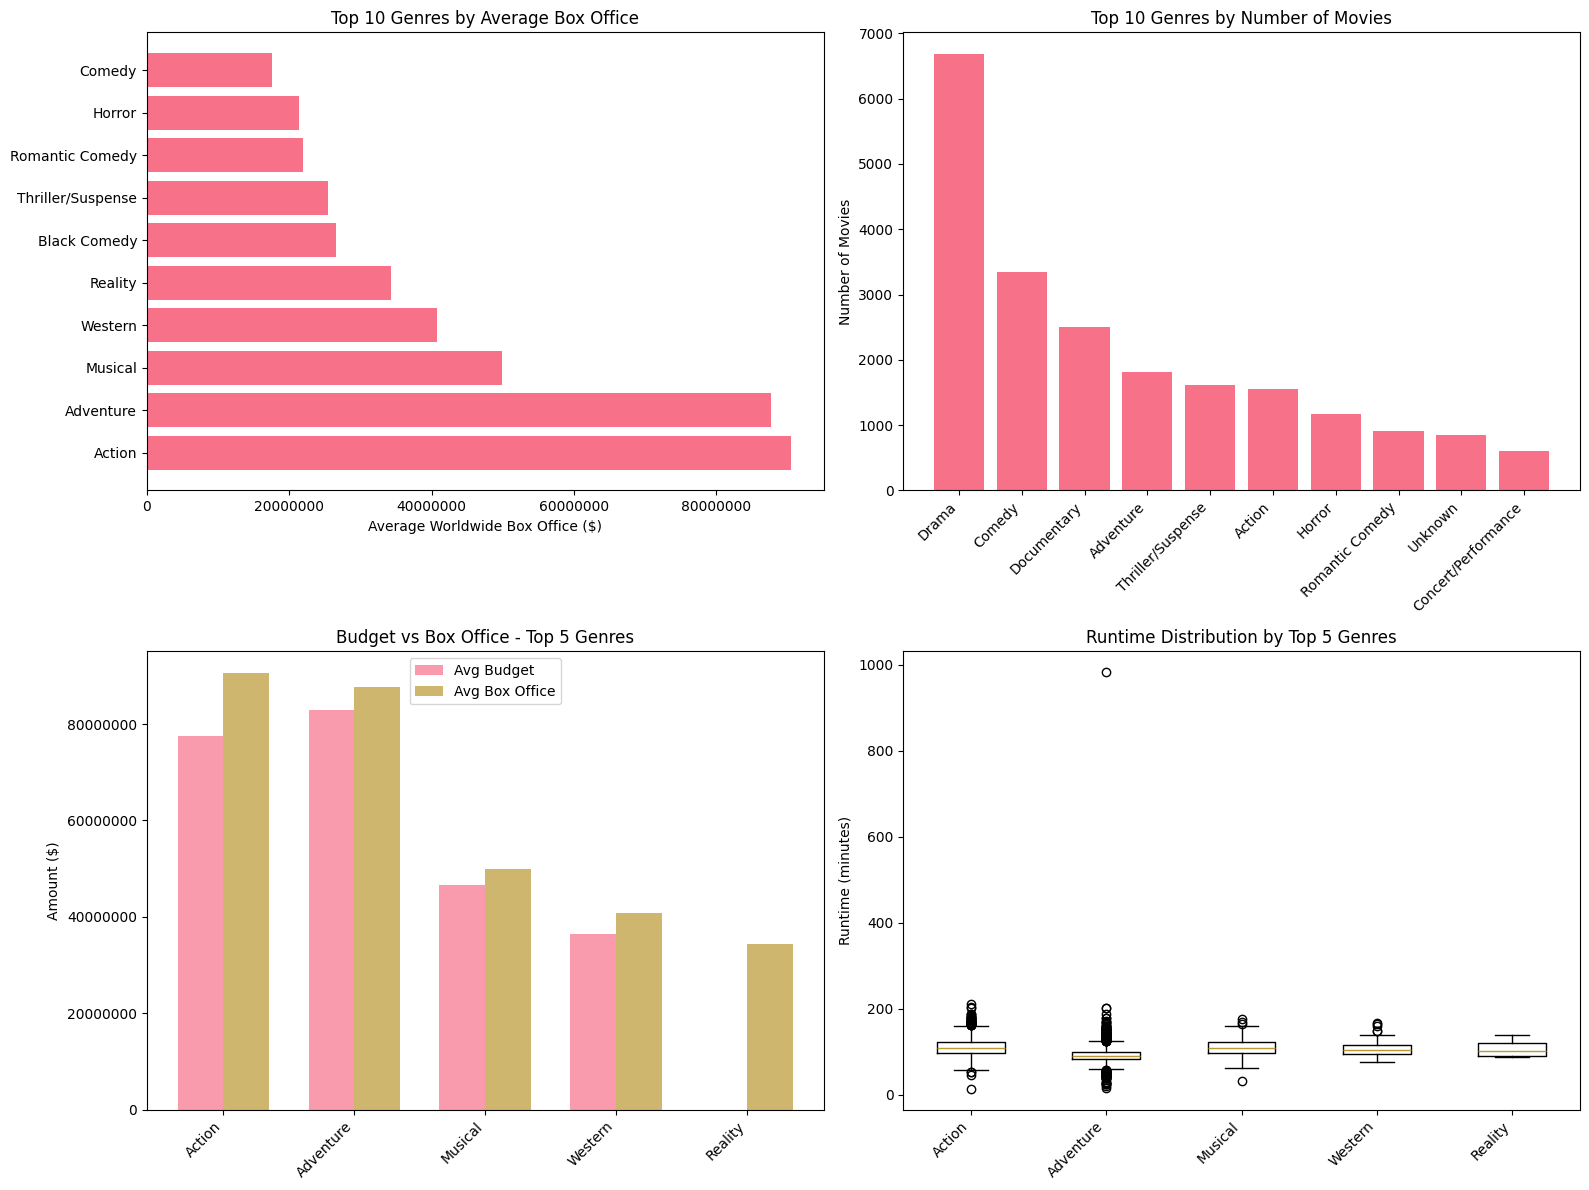


💰 Financial Performance Analysis
Financial Performance Statistics:
       worldwide_box_office  production_budget           roi        profit
count          3.900000e+03       3.900000e+03   3900.000000  3.900000e+03
mean           1.184273e+08       4.052815e+07    293.570355  7.789916e+07
std            2.082367e+08       4.812358e+07   1321.269865  1.746852e+08
min            1.700000e+01       7.000000e+03    -99.999773 -1.580898e+08
25%            1.171891e+07       9.500000e+06    -13.512707 -1.107990e+06
50%            4.422960e+07       2.400000e+07    103.577194  1.850481e+07
75%            1.289034e+08       5.000000e+07    293.487500  8.015235e+07
max            2.845900e+09       4.000000e+08  43051.785333  2.608900e+09


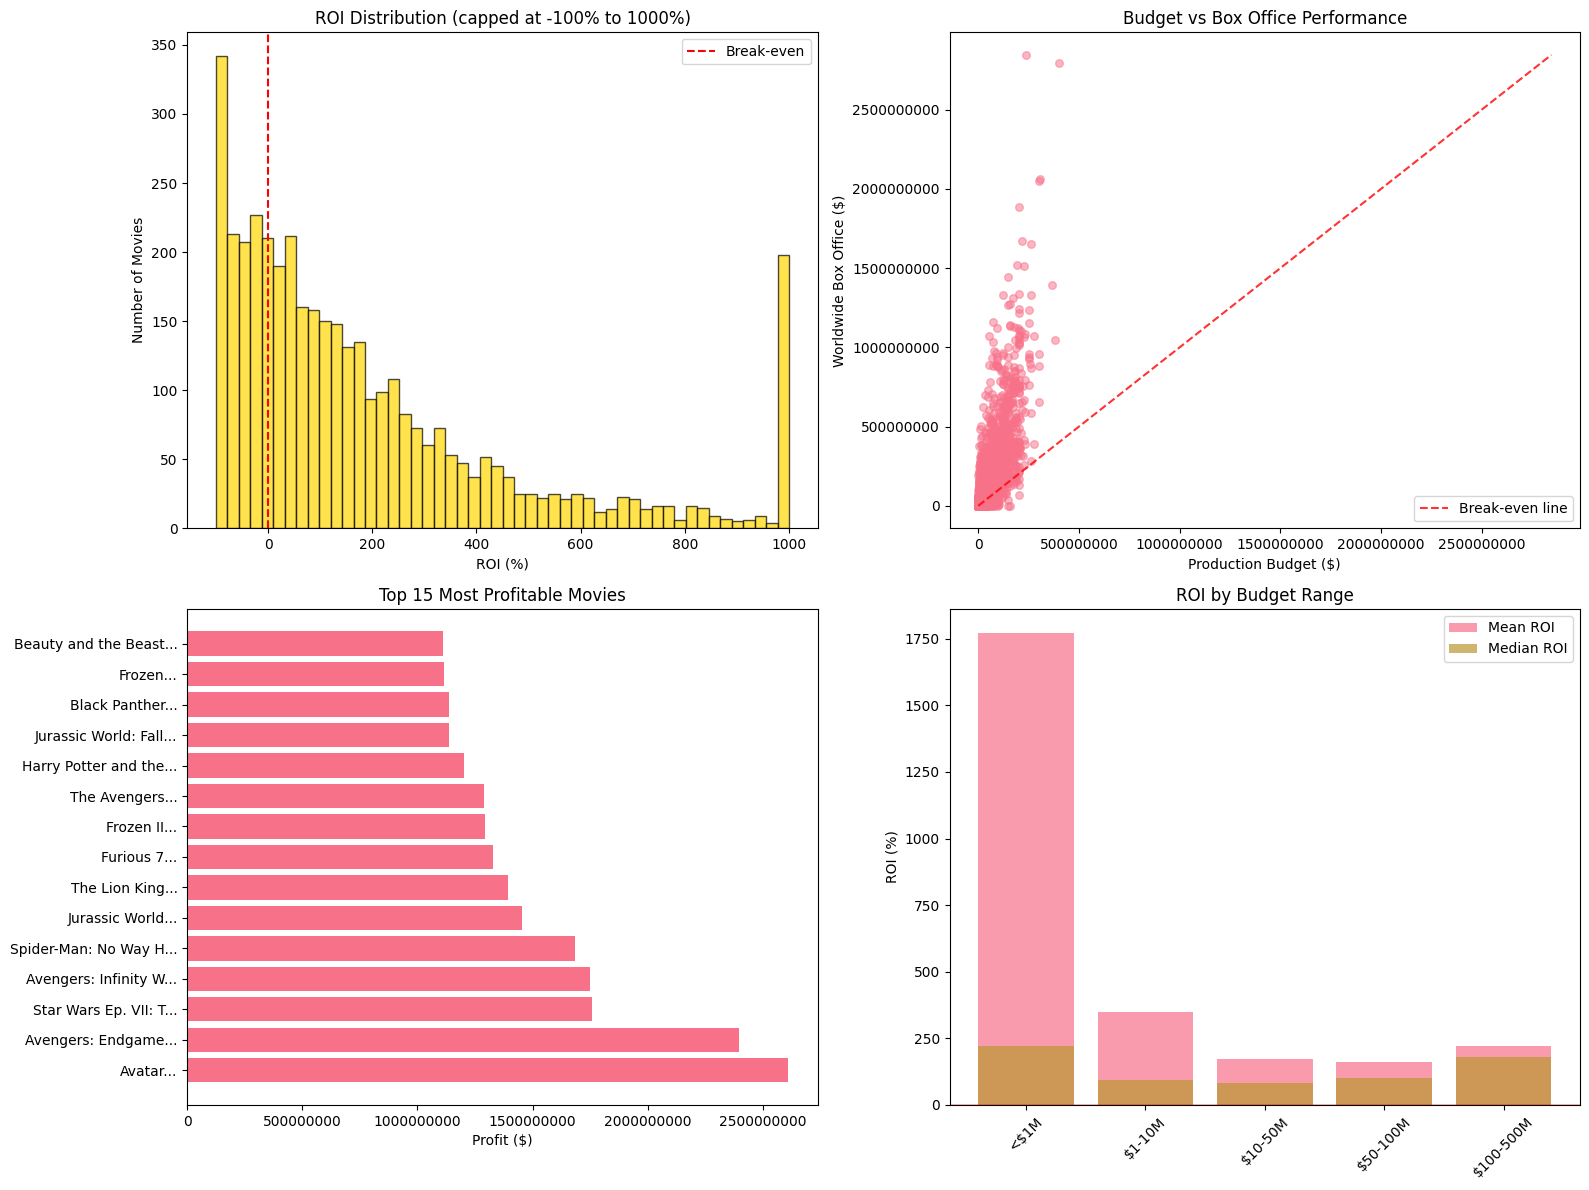


🎯 KEY INSIGHTS AND RECOMMENDATIONS
📊 DATA QUALITY:
   • Only 12.7% of movies have complete financial data
   • 30,612 total movies in dataset
   • 3,900 movies with complete budget and box office data

📈 INDUSTRY TRENDS:
   • Average 2329 movies released annually (2015+)
   • Average box office has decreased by 45.2% since 2015

🎭 GENRE PERFORMANCE:
   • Highest earning genre: Action ($90,540,605 avg)
   • Most produced genre: Drama (6681 movies)

💰 FINANCIAL PERFORMANCE:
   • 71.6% of movies are profitable
   • Median ROI: 103.6%
   • 3,900 movies analyzed for profitability

🚀 BUSINESS RECOMMENDATIONS:
   • Focus on high-ROI genres: Documentary, Horror, Concert/Performance
   • Improve data collection - missing financial data limits analysis
   • Consider budget optimization - higher budgets don't guarantee higher returns
   • Monitor genre trends - audience preferences shift over time

🎬 ANALYSIS COMPLETE!
This comprehensive analysis provides insights into:
• Missing data patterns a

In [2]:
# Movie Sales Data Analysis
# Comprehensive analysis of movie industry sales data with missing value handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🎬 Movie Sales Data Analysis")
print("=" * 50)

# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

def load_and_explore_data():
    """Load both datasets and perform initial exploration"""
    
    print("\n📊 Loading Data...")
    
    # Load sales data
    sales_df = pd.read_excel('./data/sales.xlsx')
    print(f"Sales data loaded: {sales_df.shape[0]} rows, {sales_df.shape[1]} columns")
    
    # Load metadata 
    meta_df = pd.read_excel('./data/metaClean43Brightspace.xlsx')
    print(f"Metadata loaded: {meta_df.shape[0]} rows, {meta_df.shape[1]} columns")
    
    print("\n📋 Sales Data Columns:")
    print(sales_df.columns.tolist())
    
    print("\n📋 Metadata Columns:")
    print(meta_df.columns.tolist())
    
    print("\n🔍 Sales Data Sample:")
    print(sales_df.head())
    
    print("\n🔍 Sales Data Info:")
    print(sales_df.info())
    
    return sales_df, meta_df

# Load the data
sales_df, meta_df = load_and_explore_data()

# =============================================================================
# 2. MISSING DATA ANALYSIS AND VISUALIZATION
# =============================================================================

def analyze_missing_data(df, dataset_name):
    """Comprehensive missing data analysis"""
    
    print(f"\n🔍 Missing Data Analysis - {dataset_name}")
    print("=" * 40)
    
    # Calculate missing data statistics
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing_count.index,
        'Missing Count': missing_count.values,
        'Missing Percentage': missing_percent.values
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)
    
    print("Missing Data Summary:")
    print(missing_df.to_string(index=False))
    
    # Visualize missing data patterns
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Missing data heatmap
    plt.subplot(2, 2, 1)
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title(f'Missing Data Heatmap - {dataset_name}')
    plt.xlabel('Columns')
    
    # 2. Missing data bar chart
    plt.subplot(2, 2, 2)
    missing_df.plot(x='Column', y='Missing Percentage', kind='bar', ax=plt.gca(), color='coral')
    plt.title(f'Missing Data Percentage by Column - {dataset_name}')
    plt.xticks(rotation=45)
    plt.ylabel('Missing Percentage (%)')
    
    # 3. Missing data matrix
    plt.subplot(2, 2, 3)
    # Create a simple missing data matrix
    missing_matrix = df.isnull().astype(int)
    plt.imshow(missing_matrix.T, cmap='RdYlBu', aspect='auto')
    plt.title(f'Missing Data Matrix - {dataset_name}')
    plt.ylabel('Columns')
    plt.xlabel('Rows (sampled)')
    
    # 4. Data completeness pie chart
    plt.subplot(2, 2, 4)
    total_cells = df.shape[0] * df.shape[1]
    missing_cells = df.isnull().sum().sum()
    complete_cells = total_cells - missing_cells
    
    plt.pie([complete_cells, missing_cells], 
            labels=['Complete Data', 'Missing Data'],
            colors=['lightgreen', 'lightcoral'],
            autopct='%1.1f%%')
    plt.title(f'Overall Data Completeness - {dataset_name}')
    
    plt.tight_layout()
    plt.show()
    
    return missing_df

# Analyze missing data for both datasets
sales_missing = analyze_missing_data(sales_df, "Sales Data")
meta_missing = analyze_missing_data(meta_df, "Metadata")

# =============================================================================
# 3. DATA CLEANING AND MISSING VALUE HANDLING
# =============================================================================

def clean_sales_data(df):
    """Clean and handle missing values in sales data"""
    
    print("\n🧹 Cleaning Sales Data...")
    
    # Create a copy for cleaning
    cleaned_df = df.copy()
    
    # Handle 'n/a' strings - convert to NaN
    cleaned_df = cleaned_df.replace('n/a', np.nan)
    
    # Clean numeric columns
    numeric_columns = ['international_box_office', 'domestic_box_office', 
                      'worldwide_box_office', 'production_budget', 
                      'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime']
    
    for col in numeric_columns:
        if col in cleaned_df.columns:
            # Convert to numeric, errors='coerce' will convert non-numeric to NaN
            cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
    
    # Handle year column
    if 'year' in cleaned_df.columns:
        cleaned_df['year'] = pd.to_numeric(cleaned_df['year'], errors='coerce')
    
    # Create derived columns where possible
    if 'domestic_box_office' in cleaned_df.columns and 'international_box_office' in cleaned_df.columns:
        # Calculate worldwide box office where missing
        mask = cleaned_df['worldwide_box_office'].isna() & \
               cleaned_df['domestic_box_office'].notna() & \
               cleaned_df['international_box_office'].notna()
        cleaned_df.loc[mask, 'worldwide_box_office'] = (
            cleaned_df.loc[mask, 'domestic_box_office'] + 
            cleaned_df.loc[mask, 'international_box_office']
        )
    
    # Fill missing values with appropriate strategies
    
    # For categorical columns, use mode or 'Unknown'
    categorical_columns = ['genre', 'creative_type', 'keywords']
    for col in categorical_columns:
        if col in cleaned_df.columns:
            # Fill with 'Unknown' for now
            cleaned_df[col] = cleaned_df[col].fillna('Unknown')
    
    # For numeric columns, we'll be strategic
    # Runtime: fill with median by genre
    if 'runtime' in cleaned_df.columns and 'genre' in cleaned_df.columns:
        runtime_median_by_genre = cleaned_df.groupby('genre')['runtime'].median()
        for genre in cleaned_df['genre'].unique():
            mask = (cleaned_df['genre'] == genre) & (cleaned_df['runtime'].isna())
            if mask.any() and genre in runtime_median_by_genre:
                cleaned_df.loc[mask, 'runtime'] = runtime_median_by_genre[genre]
        # Fill remaining with overall median
        cleaned_df['runtime'] = cleaned_df['runtime'].fillna(cleaned_df['runtime'].median())
    
    # For budget and box office, we'll keep NaN for now as 0 would be misleading
    
    print(f"Data shape after cleaning: {cleaned_df.shape}")
    print(f"Missing data reduced from {df.isnull().sum().sum()} to {cleaned_df.isnull().sum().sum()}")
    
    return cleaned_df

def clean_meta_data(df):
    """Clean and handle missing values in metadata"""
    
    print("\n🧹 Cleaning Metadata...")
    
    cleaned_df = df.copy()
    
    # Clean numeric columns
    numeric_columns = ['runtime', 'metascore', 'userscore']
    
    for col in numeric_columns:
        if col in cleaned_df.columns:
            cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')
    
    # Handle release date
    if 'RelDate' in cleaned_df.columns:
        cleaned_df['RelDate'] = pd.to_datetime(cleaned_df['RelDate'], errors='coerce')
        cleaned_df['release_year'] = cleaned_df['RelDate'].dt.year
    
    # Fill categorical missing values
    categorical_columns = ['studio', 'rating', 'director', 'genre']
    for col in categorical_columns:
        if col in cleaned_df.columns:
            cleaned_df[col] = cleaned_df[col].fillna('Unknown')
    
    print(f"Metadata shape after cleaning: {cleaned_df.shape}")
    
    return cleaned_df

# Clean both datasets
sales_clean = clean_sales_data(sales_df)
meta_clean = clean_meta_data(meta_df)

# =============================================================================
# 4. DESCRIPTIVE STATISTICS AND SUMMARY
# =============================================================================

def generate_descriptive_stats(df, dataset_name):
    """Generate comprehensive descriptive statistics"""
    
    print(f"\n📈 Descriptive Statistics - {dataset_name}")
    print("=" * 50)
    
    # Basic statistics for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print("\nNumeric Variables Summary:")
        desc_stats = df[numeric_cols].describe()
        print(desc_stats)
        
        # Additional statistics
        print("\nAdditional Statistics:")
        additional_stats = pd.DataFrame({
            'Missing Count': df[numeric_cols].isnull().sum(),
            'Missing %': (df[numeric_cols].isnull().sum() / len(df)) * 100,
            'Unique Values': df[numeric_cols].nunique(),
            'Skewness': df[numeric_cols].skew(),
        })
        print(additional_stats)
    
    # Categorical variables summary
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"\nCategorical Variables Summary:")
        for col in categorical_cols[:5]:  # Show first 5 to avoid too much output
            print(f"\n{col}:")
            value_counts = df[col].value_counts().head(10)
            print(value_counts)

# Generate descriptive statistics
generate_descriptive_stats(sales_clean, "Sales Data")
generate_descriptive_stats(meta_clean, "Metadata")

# =============================================================================
# 5. TIME SERIES ANALYSIS AND TRENDS
# =============================================================================

def analyze_time_trends(df):
    """Analyze trends over time in the movie industry"""
    
    print("\n📅 Time Series Analysis")
    print("=" * 30)
    
    # Create yearly aggregations
    yearly_stats = df.groupby('year').agg({
        'worldwide_box_office': ['count', 'mean', 'median', 'sum'],
        'production_budget': ['mean', 'median'],
        'domestic_box_office': ['mean', 'sum'],
        'runtime': 'mean'
    }).round(2)
    
    # Flatten column names
    yearly_stats.columns = ['_'.join(col).strip() for col in yearly_stats.columns.values]
    yearly_stats = yearly_stats.reset_index()
    
    # Create visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Number of movies per year
    plt.subplot(2, 3, 1)
    plt.plot(yearly_stats['year'], yearly_stats['worldwide_box_office_count'], marker='o')
    plt.title('Number of Movies Released per Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Movies')
    plt.grid(True, alpha=0.3)
    
    # 2. Average worldwide box office
    plt.subplot(2, 3, 2)
    plt.plot(yearly_stats['year'], yearly_stats['worldwide_box_office_mean'], marker='o', color='green')
    plt.title('Average Worldwide Box Office by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Box Office ($)')
    plt.grid(True, alpha=0.3)
    plt.ticklabel_format(style='plain', axis='y')
    
    # 3. Total box office by year
    plt.subplot(2, 3, 3)
    plt.bar(yearly_stats['year'], yearly_stats['worldwide_box_office_sum'], alpha=0.7, color='blue')
    plt.title('Total Worldwide Box Office by Year')
    plt.xlabel('Year')
    plt.ylabel('Total Box Office ($)')
    plt.xticks(rotation=45)
    plt.ticklabel_format(style='plain', axis='y')
    
    # 4. Average production budget over time
    plt.subplot(2, 3, 4)
    budget_data = yearly_stats.dropna(subset=['production_budget_mean'])
    plt.plot(budget_data['year'], budget_data['production_budget_mean'], marker='s', color='red')
    plt.title('Average Production Budget by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Budget ($)')
    plt.grid(True, alpha=0.3)
    plt.ticklabel_format(style='plain', axis='y')
    
    # 5. Average runtime over time
    plt.subplot(2, 3, 5)
    runtime_data = yearly_stats.dropna(subset=['runtime_mean'])
    plt.plot(runtime_data['year'], runtime_data['runtime_mean'], marker='^', color='purple')
    plt.title('Average Runtime by Year')
    plt.xlabel('Year')
    plt.ylabel('Average Runtime (minutes)')
    plt.grid(True, alpha=0.3)
    
    # 6. Box office vs Budget trend
    plt.subplot(2, 3, 6)
    valid_data = yearly_stats.dropna(subset=['worldwide_box_office_mean', 'production_budget_mean'])
    plt.scatter(valid_data['production_budget_mean'], valid_data['worldwide_box_office_mean'], 
                c=valid_data['year'], cmap='viridis', alpha=0.7)
    plt.colorbar(label='Year')
    plt.xlabel('Average Production Budget ($)')
    plt.ylabel('Average Worldwide Box Office ($)')
    plt.title('Budget vs Box Office Over Time')
    plt.ticklabel_format(style='plain', axis='both')
    
    plt.tight_layout()
    plt.show()
    
    return yearly_stats

# Analyze time trends
yearly_trends = analyze_time_trends(sales_clean)

# =============================================================================
# 6. GENRE AND CATEGORICAL ANALYSIS
# =============================================================================

def analyze_genres(df):
    """Analyze performance by genre and other categories"""
    
    print("\n🎭 Genre Analysis")
    print("=" * 20)
    
    # Genre performance analysis
    genre_stats = df.groupby('genre').agg({
        'worldwide_box_office': ['count', 'mean', 'median', 'sum'],
        'production_budget': ['mean', 'median'],
        'runtime': 'mean'
    }).round(2)
    
    genre_stats.columns = ['_'.join(col).strip() for col in genre_stats.columns.values]
    genre_stats = genre_stats.reset_index()
    genre_stats = genre_stats.sort_values('worldwide_box_office_mean', ascending=False)
    
    print("Top 10 Genres by Average Box Office:")
    print(genre_stats.head(10)[['genre', 'worldwide_box_office_count', 'worldwide_box_office_mean']])
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Top genres by average box office
    plt.subplot(2, 2, 1)
    top_genres = genre_stats.head(10)
    plt.barh(range(len(top_genres)), top_genres['worldwide_box_office_mean'])
    plt.yticks(range(len(top_genres)), top_genres['genre'])
    plt.title('Top 10 Genres by Average Box Office')
    plt.xlabel('Average Worldwide Box Office ($)')
    plt.ticklabel_format(style='plain', axis='x')
    
    # 2. Number of movies by genre
    plt.subplot(2, 2, 2)
    top_genres_count = genre_stats.sort_values('worldwide_box_office_count', ascending=False).head(10)
    plt.bar(range(len(top_genres_count)), top_genres_count['worldwide_box_office_count'])
    plt.xticks(range(len(top_genres_count)), top_genres_count['genre'], rotation=45, ha='right')
    plt.title('Top 10 Genres by Number of Movies')
    plt.ylabel('Number of Movies')
    
    # 3. Budget vs Box Office by Genre (top genres only)
    plt.subplot(2, 2, 3)
    top_5_genres = genre_stats.head(5)
    x = range(len(top_5_genres))
    width = 0.35
    plt.bar([i - width/2 for i in x], top_5_genres['production_budget_mean'], 
            width, label='Avg Budget', alpha=0.7)
    plt.bar([i + width/2 for i in x], top_5_genres['worldwide_box_office_mean'], 
            width, label='Avg Box Office', alpha=0.7)
    plt.xticks(x, top_5_genres['genre'], rotation=45, ha='right')
    plt.title('Budget vs Box Office - Top 5 Genres')
    plt.ylabel('Amount ($)')
    plt.legend()
    plt.ticklabel_format(style='plain', axis='y')
    
    # 4. Runtime distribution by top genres
    plt.subplot(2, 2, 4)
    top_genre_names = top_genres['genre'].head(5).tolist()
    runtime_by_genre = [df[df['genre'] == genre]['runtime'].dropna() for genre in top_genre_names]
    plt.boxplot(runtime_by_genre, labels=top_genre_names)
    plt.title('Runtime Distribution by Top 5 Genres')
    plt.ylabel('Runtime (minutes)')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    return genre_stats

# Analyze genres
genre_analysis = analyze_genres(sales_clean)

# =============================================================================
# 7. FINANCIAL PERFORMANCE INSIGHTS
# =============================================================================

def analyze_financial_performance(df):
    """Analyze financial performance and profitability"""
    
    print("\n💰 Financial Performance Analysis")
    print("=" * 35)
    
    # Calculate ROI where possible
    df_financial = df.copy()
    
    # Calculate ROI (Return on Investment)
    mask = (df_financial['worldwide_box_office'].notna()) & \
           (df_financial['production_budget'].notna()) & \
           (df_financial['production_budget'] > 0)
    
    df_financial.loc[mask, 'roi'] = (
        (df_financial.loc[mask, 'worldwide_box_office'] - df_financial.loc[mask, 'production_budget']) / 
        df_financial.loc[mask, 'production_budget'] * 100
    )
    
    # Calculate profit
    df_financial.loc[mask, 'profit'] = (
        df_financial.loc[mask, 'worldwide_box_office'] - df_financial.loc[mask, 'production_budget']
    )
    
    # Financial statistics
    financial_stats = df_financial[df_financial['roi'].notna()].describe()
    print("Financial Performance Statistics:")
    print(financial_stats[['worldwide_box_office', 'production_budget', 'roi', 'profit']])
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. ROI distribution
    plt.subplot(2, 2, 1)
    roi_data = df_financial['roi'].dropna()
    # Cap extreme values for better visualization
    roi_capped = np.clip(roi_data, -100, 1000)
    plt.hist(roi_capped, bins=50, alpha=0.7, color='gold', edgecolor='black')
    plt.title('ROI Distribution (capped at -100% to 1000%)')
    plt.xlabel('ROI (%)')
    plt.ylabel('Number of Movies')
    plt.axvline(x=0, color='red', linestyle='--', label='Break-even')
    plt.legend()
    
    # 2. Budget vs Box Office scatter
    plt.subplot(2, 2, 2)
    budget_data = df_financial.dropna(subset=['production_budget', 'worldwide_box_office'])
    plt.scatter(budget_data['production_budget'], budget_data['worldwide_box_office'], 
                alpha=0.5, s=30)
    plt.xlabel('Production Budget ($)')
    plt.ylabel('Worldwide Box Office ($)')
    plt.title('Budget vs Box Office Performance')
    
    # Add break-even line
    max_val = max(budget_data['production_budget'].max(), budget_data['worldwide_box_office'].max())
    plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.8, label='Break-even line')
    plt.legend()
    plt.ticklabel_format(style='plain', axis='both')
    
    # 3. Top profitable movies
    plt.subplot(2, 2, 3)
    top_profitable = df_financial.nlargest(15, 'profit')[['title', 'profit']].copy()
    top_profitable['title_short'] = top_profitable['title'].str[:20] + '...'
    plt.barh(range(len(top_profitable)), top_profitable['profit'])
    plt.yticks(range(len(top_profitable)), top_profitable['title_short'])
    plt.title('Top 15 Most Profitable Movies')
    plt.xlabel('Profit ($)')
    plt.ticklabel_format(style='plain', axis='x')
    
    # 4. ROI by budget ranges
    plt.subplot(2, 2, 4)
    # Create budget bins
    budget_bins = [0, 1e6, 10e6, 50e6, 100e6, 500e6]
    budget_labels = ['<$1M', '$1-10M', '$10-50M', '$50-100M', '$100-500M']
    
    df_financial['budget_range'] = pd.cut(df_financial['production_budget'], 
                                        bins=budget_bins, labels=budget_labels, include_lowest=True)
    
    roi_by_budget = df_financial.groupby('budget_range')['roi'].agg(['mean', 'median', 'count'])
    roi_by_budget = roi_by_budget.dropna()
    
    x = range(len(roi_by_budget))
    plt.bar(x, roi_by_budget['mean'], alpha=0.7, label='Mean ROI')
    plt.bar(x, roi_by_budget['median'], alpha=0.7, label='Median ROI')
    plt.xticks(x, roi_by_budget.index, rotation=45)
    plt.title('ROI by Budget Range')
    plt.ylabel('ROI (%)')
    plt.legend()
    plt.axhline(y=0, color='red', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return df_financial

# Analyze financial performance
financial_analysis = analyze_financial_performance(sales_clean)

# =============================================================================
# 8. KEY INSIGHTS AND RECOMMENDATIONS
# =============================================================================

def generate_insights(sales_df, yearly_trends, genre_analysis, financial_df):
    """Generate key business insights and recommendations"""
    
    print("\n🎯 KEY INSIGHTS AND RECOMMENDATIONS")
    print("=" * 50)
    
    insights = []
    
    # Data Quality Insights
    total_movies = len(sales_df)
    complete_financial_data = len(financial_df.dropna(subset=['production_budget', 'worldwide_box_office']))
    data_completeness = (complete_financial_data / total_movies) * 100
    
    insights.append(f"📊 DATA QUALITY:")
    insights.append(f"   • Only {data_completeness:.1f}% of movies have complete financial data")
    insights.append(f"   • {total_movies:,} total movies in dataset")
    insights.append(f"   • {complete_financial_data:,} movies with complete budget and box office data")
    
    # Time Trends
    if not yearly_trends.empty:
        recent_years = yearly_trends[yearly_trends['year'] >= 2015]
        if not recent_years.empty:
            avg_recent_movies = recent_years['worldwide_box_office_count'].mean()
            insights.append(f"\n📈 INDUSTRY TRENDS:")
            insights.append(f"   • Average {avg_recent_movies:.0f} movies released annually (2015+)")
            
            # Box office trends
            if len(recent_years) > 1:
                bo_trend = recent_years['worldwide_box_office_mean'].iloc[-1] / recent_years['worldwide_box_office_mean'].iloc[0]
                trend_direction = "increased" if bo_trend > 1 else "decreased"
                insights.append(f"   • Average box office has {trend_direction} by {abs(bo_trend-1)*100:.1f}% since 2015")
    
    # Genre Insights
    if not genre_analysis.empty:
        top_genre = genre_analysis.iloc[0]
        most_popular_genre = genre_analysis.sort_values('worldwide_box_office_count', ascending=False).iloc[0]
        
        insights.append(f"\n🎭 GENRE PERFORMANCE:")
        insights.append(f"   • Highest earning genre: {top_genre['genre']} (${top_genre['worldwide_box_office_mean']:,.0f} avg)")
        insights.append(f"   • Most produced genre: {most_popular_genre['genre']} ({most_popular_genre['worldwide_box_office_count']} movies)")
    
    # Financial Insights
    roi_data = financial_df['roi'].dropna()
    if not roi_data.empty:
        profitable_movies = (roi_data > 0).sum()
        total_analyzed = len(roi_data)
        success_rate = (profitable_movies / total_analyzed) * 100
        median_roi = roi_data.median()
        
        insights.append(f"\n💰 FINANCIAL PERFORMANCE:")
        insights.append(f"   • {success_rate:.1f}% of movies are profitable")
        insights.append(f"   • Median ROI: {median_roi:.1f}%")
        insights.append(f"   • {total_analyzed:,} movies analyzed for profitability")
    
    # Business Recommendations
    insights.append(f"\n🚀 BUSINESS RECOMMENDATIONS:")
    
    if not genre_analysis.empty:
        # Find genres with good ROI and reasonable volume
        genre_roi = financial_df.groupby('genre')['roi'].agg(['mean', 'count']).reset_index()
        good_genres = genre_roi[(genre_roi['mean'] > 50) & (genre_roi['count'] >= 10)].sort_values('mean', ascending=False)
        
        if not good_genres.empty:
            insights.append(f"   • Focus on high-ROI genres: {', '.join(good_genres['genre'].head(3).tolist())}")
    
    insights.append(f"   • Improve data collection - missing financial data limits analysis")
    insights.append(f"   • Consider budget optimization - higher budgets don't guarantee higher returns")
    insights.append(f"   • Monitor genre trends - audience preferences shift over time")
    
    # Print all insights
    for insight in insights:
        print(insight)
    
    return insights

# Generate insights
key_insights = generate_insights(sales_clean, yearly_trends, genre_analysis, financial_analysis)

print("\n" + "="*60)
print("🎬 ANALYSIS COMPLETE!")
print("="*60)
print("This comprehensive analysis provides insights into:")
print("• Missing data patterns and cleaning strategies")
print("• Time trends in the movie industry") 
print("• Genre performance comparisons")
print("• Financial performance and profitability")
print("• Key business insights and recommendations")
print("\nUse these insights to make data-driven decisions about:")
print("• Investment strategies")
print("• Genre selection") 
print("• Budget allocation")
print("• Market timing")